In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

# 1. Introduction

## Question
What factors significantly influence students' mental health, and can we predict mental health outcomes based on lifestyle and academic variables?

## Motivation
Mental health among students is a critical issue affecting academic performance, personal growth, and overall well-being. By identifying influencing factors and predicting outcomes, targeted interventions can be designed.

## Dataset Source
The dataset used in this project was obtained from the Kaggle platform. It is available on the following [Kaggle link](https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments/data).

- **License**: CC0: Public Domain

## About the Dataset

The dataset represents mental health evaluations of students and seeks to provide valuable insights into the factors impacting their mental health. Comprising a rich collection of records, these data are carefully selected from various anonymous sources to ensure privacy and confidentiality. It is essential to acknowledge that no dataset is ever 100% accurate, as it can be affected by numerous sources of error and uncertainty. For previous listings, check older versions of the dataset.

## Content

- **Stress_Level**: The level of stress experienced by the individual.
- **Depression_Score**: The score representing the level of depression experienced by the individual.
- **Anxiety_Score**: The score representing the level of anxiety experienced by the individual.
- **Sleep_Quality**: The quality of sleep experienced by the individual.
- **Physical_Activity**: The level of physical activity.
- **Diet_Quality**: The quality of the individual's diet.
- **Social_Support**: The level of social support received by the individual.
- **Substance_Use**: The frequency of substance use, such as alcohol, cigarettes, or other drugs.
- **Family_History**: Whether the individual has a family history of mental health issues.
- **Chronic_Illness**: Details any chronic illnesses the individual may have.
- **Financial_Stress**: The level of financial stress experienced by the individual, rated between 0 and 5.
- **Semester_Credit_Load**: The number of credits the individual is taking in the semester, ranging from 15 to 30.


# 2. Methodology

## Dataset Description
Variables include demographic information, academic performance (e.g., CGPA, course), lifestyle factors (e.g., sleep quality, diet, physical activity), and mental health indicators (e.g., stress, anxiety, depression scores).

## Steps
- **Data Cleaning**: Handle missing values and ensure consistency in data types.
- **Exploratory Data Analysis (EDA)**: Analyze distributions, correlations, and trends among key variables.
- **Modeling**: Build a logistic regression or decision tree model to predict mental health outcomes.

# 3. Exploratory Data Analysis (EDA)

## Examine the distributions of:
- Stress level, depression score, anxiety score.
- Sleep quality, physical activity, and diet quality.

## Correlations:
Explore relationships between mental health indicators and academic/lifestyle factors.

## Trends:
Identify patterns based on gender, residence type, or course.

# 4. Predictive Modeling

## Objective
Predict mental health outcomes using:
- **Independent variables**: Sleep quality, CGPA, diet, social support, and physical activity.
- **Dependent variables**: Stress level, depression score, and anxiety score.
- **Model**: Implement logistic regression for binary classification of mental health severity.

# 5. Results and Interpretation

## Findings
Present key trends and model predictions.

## Visualizations:
- Distributions, heatmaps of correlations, etc.

## Implications
Discuss insights and potential interventions for improving student mental health.


In [2]:
# Load the data from the uploaded csv file
df = pd.read_csv("inputData/students_mental_health_survey.csv")

# Diplay the first few rows of the dataset to understand its structure
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [3]:
# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

missing_values, data_types


(Age                             0
 Course                          0
 Gender                          0
 CGPA                           12
 Stress_Level                    0
 Depression_Score                0
 Anxiety_Score                   0
 Sleep_Quality                   0
 Physical_Activity               0
 Diet_Quality                    0
 Social_Support                  0
 Relationship_Status             0
 Substance_Use                  15
 Counseling_Service_Use          0
 Family_History                  0
 Chronic_Illness                 0
 Financial_Stress                0
 Extracurricular_Involvement     0
 Semester_Credit_Load            0
 Residence_Type                  0
 dtype: int64,
 Age                              int64
 Course                          object
 Gender                          object
 CGPA                           float64
 Stress_Level                     int64
 Depression_Score                 int64
 Anxiety_Score                    int64
 Slee

The dataset contains 20 column and 7022 entries

## Missing Values and Data Types

### Missing Values:
- **CGPA**: 12 missing values.
- **Substance_Use**: 15 missing values.

### Data Types:
- **Numerical**: Age, CGPA, Stress_Level, Depression_Score, Anxiety_Score, Financial_Stress, Semester_Credit_Load.
- **Categorical**: Course, Gender, Sleep_Quality, Physical_Activity, Diet_Quality, Social_Support, etc.

--------------
- Variables such as `Stress_Level`, `Depression_Score`, and `Anxiety_Score` appear to measure mental health outcomes.
- Lifestyle variables include `Sleep_Quality`, `Physical_Activity`, and `Diet_Quality`.

## Next Steps for Data Cleaning:

### Impute Missing Values:
- **CGPA**: Use mean/median imputation or predictive modeling.
- **Substance_Use**: Impute with the most frequent value or consider a separate category for missing data. 

### Check for Consistency:
- Ensure categorical variables are standardized (e.g., consistent spelling).

### Prepare for EDA:
- Convert categorical variables to proper types.
- Scale numerical variables if needed for visualization or modeling.


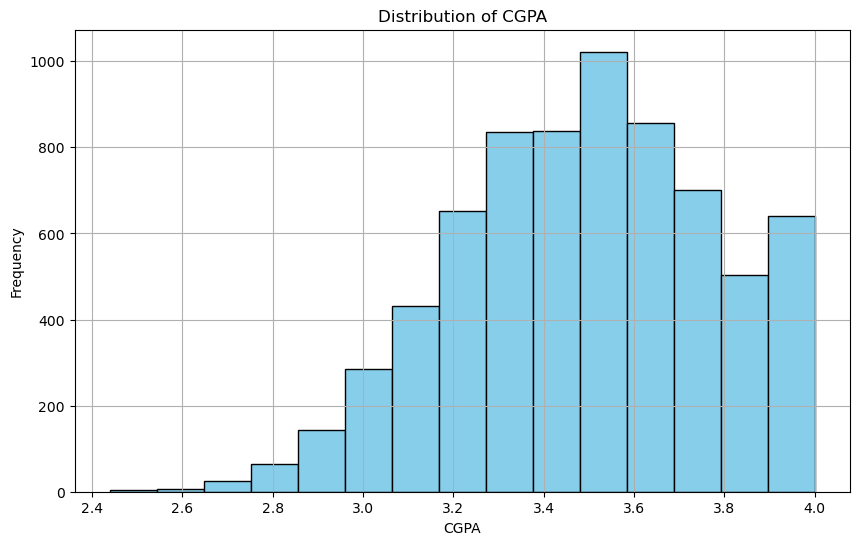

,Frequency
Substance_Use,
Never,5903
Occasionally,699
Frequently,405
NaN,15


In [4]:
# Plotting the distribution of CGPA
plt.figure(figsize=(10, 6))
plt.hist(df['CGPA'].dropna(), bins=15, color='skyblue', edgecolor='black')  # Drop NA for plotting
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Frequency of each category in the Substance_Use column
substance_use_frequency = df['Substance_Use'].value_counts(dropna=False).to_frame('Frequency')
substance_use_frequency


## CGPA Distribution

The distribution of CGPA appears to be somewhat skewed to the left, suggesting that median imputation might be a more robust method for handling the missing values in this column

## Substance_Use Column Distribution

- **Never:** 5903 occurrences  
- **Occasionally:** 699 occurrences  
- **Frequently:** 405 occurrences  
- **Missing (NaN):** 15 occurrences  

### Imputation Strategy:
Given that the "Never" category is overwhelmingly more frequent, it is reasonable to impute missing values with "Never". This approach maintains data consistency without introducing significant bias.

In [5]:
# Impute missing values for CGPA with the mean
df['CGPA'].fillna(df['CGPA'].median(), inplace=True)

# Most frequent category imputation for Substance_Use
most_frequent_substance_use = df['Substance_Use'].mode()[0]
df['Substance_Use'].fillna(most_frequent_substance_use, inplace=True)

# Check again for missing values to ensure the imputations were applied
updated_missing_data_summary = df.isnull().sum().to_frame('Missing Values After Imputation')
updated_missing_data_summary


,Missing Values After Imputation
Age,0
Course,0
Gender,0
CGPA,0
Stress_Level,0
Depression_Score,0
Anxiety_Score,0
Sleep_Quality,0
Physical_Activity,0
Diet_Quality,0


### Verify Categorical Data:
   - Check for inconsistent or redundant entries in categorical variables like `Sleep_Quality`, `Diet_Quality`.

In [6]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Unique values in each categorical column
categorical_summary = {col: df[col].unique() for col in categorical_columns}

categorical_summary


{'Course': array(['Others', 'Engineering', 'Business', 'Computer Science', 'Medical',
        'Law'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'Sleep_Quality': array(['Good', 'Average', 'Poor'], dtype=object),
 'Physical_Activity': array(['Moderate', 'Low', 'High'], dtype=object),
 'Diet_Quality': array(['Good', 'Average', 'Poor'], dtype=object),
 'Social_Support': array(['Moderate', 'Low', 'High'], dtype=object),
 'Relationship_Status': array(['Married', 'Single', 'In a Relationship'], dtype=object),
 'Substance_Use': array(['Never', 'Occasionally', 'Frequently'], dtype=object),
 'Counseling_Service_Use': array(['Never', 'Occasionally', 'Frequently'], dtype=object),
 'Family_History': array(['No', 'Yes'], dtype=object),
 'Chronic_Illness': array(['No', 'Yes'], dtype=object),
 'Extracurricular_Involvement': array(['Moderate', 'Low', 'High'], dtype=object),
 'Residence_Type': array(['On-Campus', 'Off-Campus', 'With Family'], dtype=object)}

In [7]:
# Convert categorical columns to the 'category' dtype
df[categorical_columns] = df[categorical_columns].astype('category')

# Verify the changes
updated_dtypes = df.dtypes

# Display updated data types for categorical columns
updated_dtypes[categorical_columns]


Course                         category
Gender                         category
Sleep_Quality                  category
Physical_Activity              category
Diet_Quality                   category
Social_Support                 category
Relationship_Status            category
Substance_Use                  category
Counseling_Service_Use         category
Family_History                 category
Chronic_Illness                category
Extracurricular_Involvement    category
Residence_Type                 category
dtype: object

--------
The categorical variables have been successfully converted to the category data type. This change ensures more efficient memory usage and faster operations, which is advantageous for modeling and visualization.


In [8]:
# Describe the numerical columns
numerical_description = df.describe()

# Describe the categorical columns
categorical_description = df.describe(include=['category'])

numerical_description, categorical_description


(               Age         CGPA  Stress_Level  Depression_Score  \
 count  7022.000000  7022.000000   7022.000000       7022.000000   
 mean     23.003418     3.491285      2.427941          2.254486   
 std       3.853978     0.287175      1.638408          1.625193   
 min      18.000000     2.440000      0.000000          0.000000   
 25%      20.000000     3.290000      1.000000          1.000000   
 50%      22.000000     3.500000      2.000000          2.000000   
 75%      25.000000     3.700000      4.000000          3.000000   
 max      35.000000     4.000000      5.000000          5.000000   
 
        Anxiety_Score  Financial_Stress  Semester_Credit_Load  
 count    7022.000000       7022.000000           7022.000000  
 mean        2.300484          2.453005             22.010538  
 std         1.624305          1.708995              4.358380  
 min         0.000000          0.000000             15.000000  
 25%         1.000000          1.000000             18.000000  
 5

### Data Description

#### **Numerical Variables**:
| Variable                  | Count  | Mean   | Std Dev | Min  | 25th % | Median | 75th % | Max  |
|---------------------------|--------|--------|---------|------|--------|--------|--------|------|
| **Age**                   | 7022   | 23.00  | 3.85    | 18   | 20     | 22     | 25     | 35   |
| **CGPA**                  | 7022   | 3.49   | 0.29    | 2.44 | 3.29   | 3.50   | 3.70   | 4.00 |
| **Stress_Level**          | 7022   | 2.43   | 1.64    | 0    | 1      | 2      | 4      | 5    |
| **Depression_Score**      | 7022   | 2.25   | 1.63    | 0    | 1      | 2      | 3      | 5    |
| **Anxiety_Score**         | 7022   | 2.30   | 1.62    | 0    | 1      | 2      | 4      | 5    |
| **Financial_Stress**      | 7022   | 2.45   | 1.71    | 0    | 1      | 2      | 4      | 5    |
| **Semester_Credit_Load**  | 7022   | 22.01  | 4.36    | 15   | 18     | 22     | 26     | 29   |

#### **Categorical Variables**:
| Variable                    | Unique Values | Most Frequent Value | Frequency |
|-----------------------------|---------------|----------------------|-----------|
| **Course**                  | 6             | Medical             | 2105      |
| **Gender**                  | 2             | Male                | 3547      |
| **Sleep_Quality**           | 3             | Good                | 3589      |
| **Physical_Activity**       | 3             | Moderate            | 3521      |
| **Diet_Quality**            | 3             | Average             | 4268      |
| **Social_Support**          | 3             | Moderate            | 3470      |
| **Relationship_Status**     | 3             | Single              | 3574      |
| **Substance_Use**           | 3             | Never               | 5918      |
| **Counseling_Service_Use**  | 3             | Never               | 4263      |
| **Family_History**          | 2             | No                  | 4866      |
| **Chronic_Illness**         | 2             | No                  | 6678      |
| **Extracurricular_Involvement** | 3          | Moderate            | 3440      |
| **Residence_Type**          | 3             | On-Campus           | 2815      |

### Observations:
- Most students are aged between 18-25 years, with an average CGPA of 3.49.
- The most frequent `Sleep_Quality` is "Good", and `Physical_Activity` is "Moderate".
- A majority of students have "No" family history or chronic illness.
- Substance use is predominantly "Never".

## Exploratory Data Analysis (EDA)

We will proceed with the following steps:

### Univariate Analysis:
Examine the distributions of key variables (e.g., Stress_Level, Depression_Score, etc.).

### Bivariate Analysis:
Explore relationships between mental health outcomes and other factors (e.g., CGPA, Sleep_Quality).

### Correlation Analysis:
Investigate correlations among numerical variables.

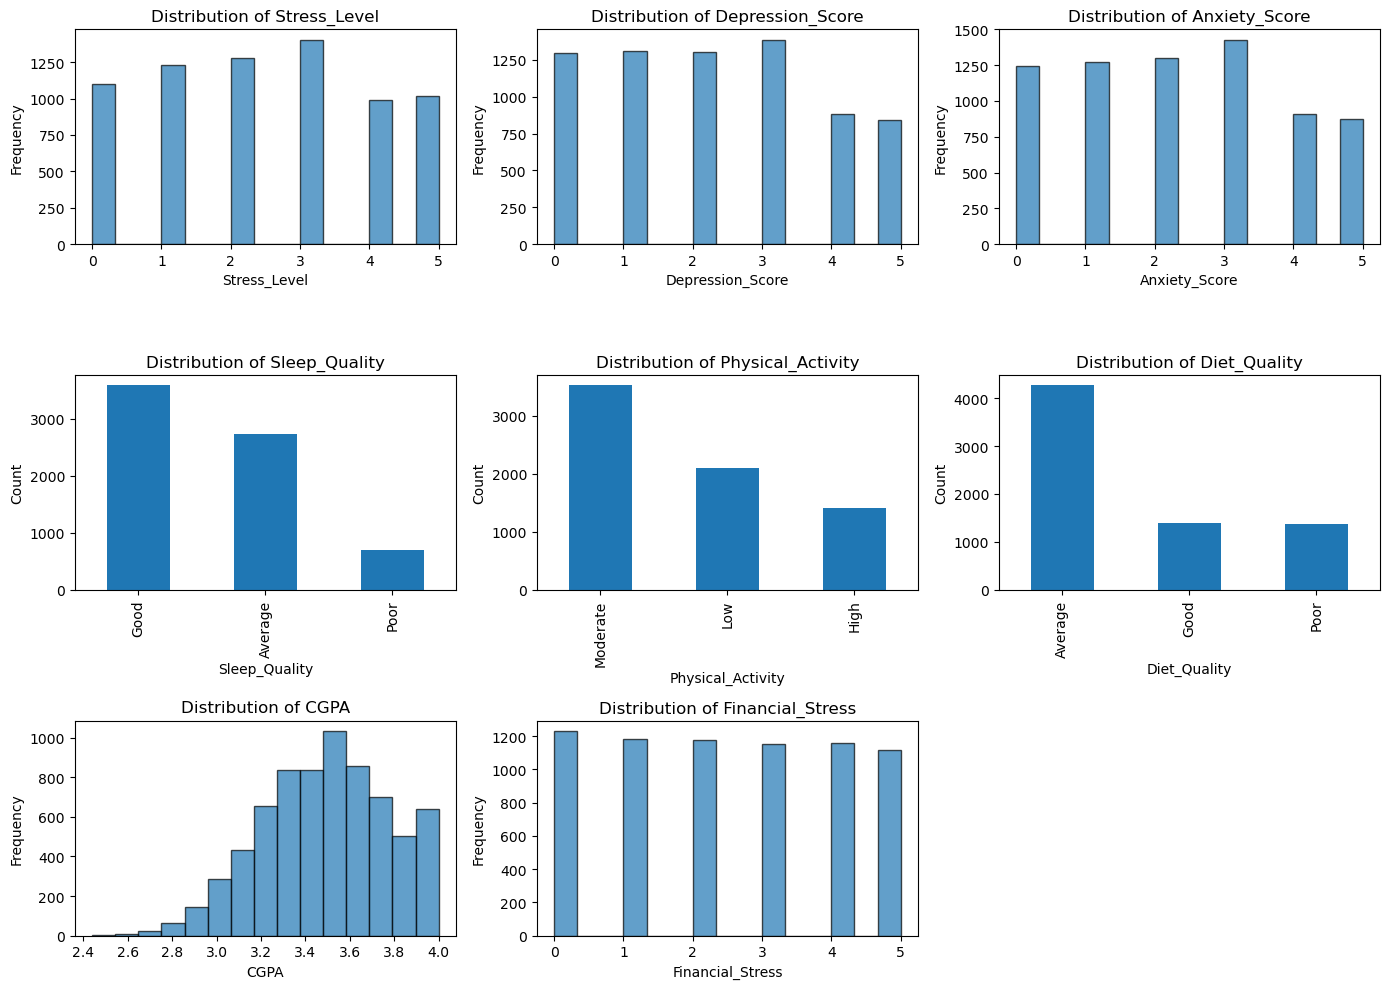

In [9]:
# Define the key variables for univariate analysis
key_variables = ['Stress_Level', 'Depression_Score', 'Anxiety_Score', 
                 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 
                 'CGPA', 'Financial_Stress']

# Plot histograms for numerical variables and bar charts for categorical variables
plt.figure(figsize=(14, 10))
for i, col in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)
    if df[col].dtype.name == 'category':
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    else:
        df[col].plot(kind='hist', bins=15, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Univariate Analysis Insights

**Stress_Level, Depression_Score, Anxiety_Score:**
- These mental health indicators show diverse distributions, with higher frequencies clustering in moderate ranges.

**Sleep_Quality, Physical_Activity, Diet_Quality:**
- These lifestyle factors are categorical and exhibit some skewness:
  - "Good" Sleep Quality is the most common.
  - "Moderate" Physical Activity levels dominate.

**CGPA:**
- CGPA follows a bell-shaped distribution, suggesting a central tendency around 3.5.

**Financial_Stress:**
- The distribution is more evenly spread across various stress levels.


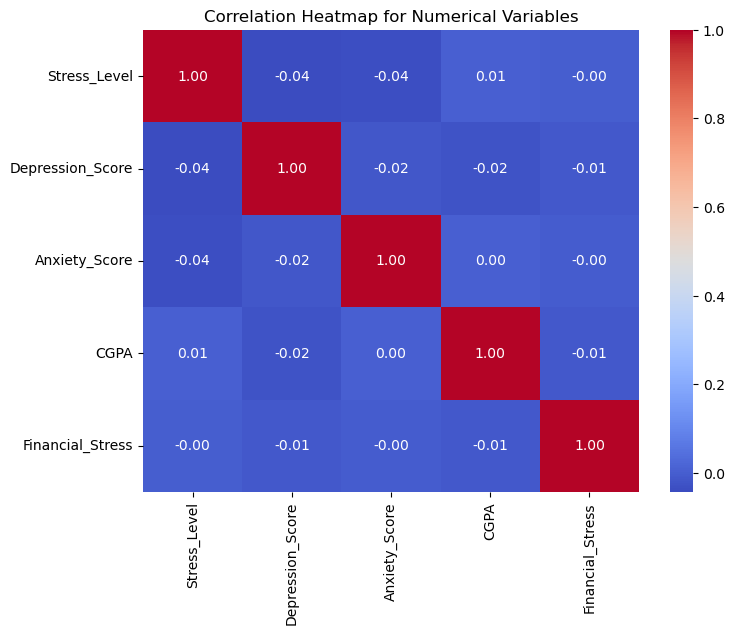

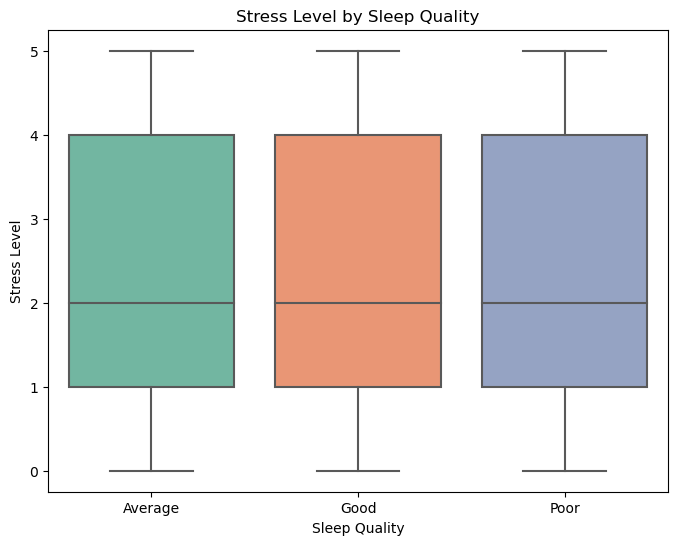

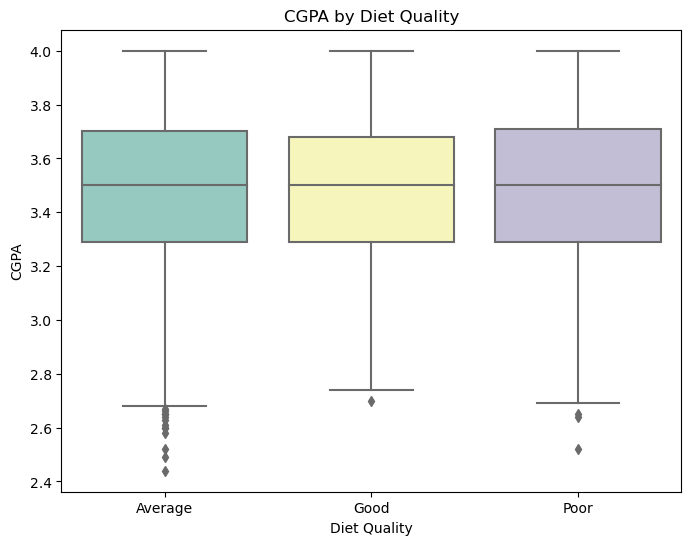

In [10]:
# Bivariate Analysis: Correlation Heatmap for Numerical Variables
numerical_columns = ['Stress_Level', 'Depression_Score', 'Anxiety_Score', 
                     'CGPA', 'Financial_Stress']

plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

# Bivariate Analysis: Boxplot of Stress_Level by Sleep_Quality
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sleep_Quality', y='Stress_Level', palette="Set2")
plt.title("Stress Level by Sleep Quality")
plt.xlabel("Sleep Quality")
plt.ylabel("Stress Level")
plt.show()

# Bivariate Analysis: CGPA by Diet Quality
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Diet_Quality', y='CGPA', palette="Set3")
plt.title("CGPA by Diet Quality")
plt.xlabel("Diet Quality")
plt.ylabel("CGPA")
plt.show()


## Interpretation of the Correlation Heatmap

1. **Stress, Depression, and Anxiety Scores:**
   - Weak negative correlations are observed among these variables.
   - This suggests these mental health indicators do not strongly influence each other directly within the dataset.

2. **CGPA:**
   - There is no significant correlation between CGPA and the mental health indicators (Stress, Depression, Anxiety).
   - This implies that academic performance (CGPA) may not directly reflect or be affected by mental health outcomes in this dataset.

3. **Financial Stress:**
   - No notable correlation with mental health indicators or CGPA.
   - Indicates that financial stress might not serve as a primary predictor of these outcomes.

### Insights
- The heatmap suggests limited interdependencies among the variables, emphasizing the need for predictive modeling to gain a better understanding of their relationships.
- Direct correlations between mental health and academic/lifestyle factors appear weak, highlighting potential complexity in how these factors interact.



---------
## Interpretation of the Boxplots

### 1. Stress Level by Sleep Quality
**Observation:**
- Stress levels appear similar across “Average,” “Good,” and “Poor” sleep quality.
- The median stress level remains consistent regardless of sleep quality, indicating no strong influence of sleep on stress in this dataset.

**Insight:**
- While good sleep quality is often associated with lower stress, this dataset does not show a clear trend. Other factors (e.g., physical activity, social support) may be at play.

### 2. CGPA by Diet Quality
**Observation:**
- Students with “Good” diet quality tend to have slightly higher CGPAs compared to those with “Average” or “Poor” diet quality.
- The CGPA distribution for “Poor” diet quality includes a few lower outliers, suggesting that some individuals may face academic challenges linked to poor nutrition.

**Insight:**
- Diet quality might have a modest influence on academic performance, with better diets correlating with improved CGPAs.

### Implications
- Sleep quality may not directly impact stress levels in this sample, but other variables should be considered.
- Diet quality could play a minor role in academic performance, indicating the need to explore additional lifestyle and environmental factors.


------------
## Predictive Modeling Framework for Mental Health Outcomes

1. **Define the Target Variable**  
   - **Target:** `Stress_Level`  
   - Convert `Stress_Level` into a binary classification:  
     - `0` for Low Stress (values ≤ 2)  
     - `1` for High Stress (values > 2)

2. **Select Predictors**  
   - **Predictors:**  
     - `Sleep_Quality`  
     - `Physical_Activity`  
     - `Diet_Quality`  
     - `CGPA`  
     - `Gender`  
     - `Financial_Stress`

3. **Split the Data**  
   - Split the data into training and testing sets:  
     - **Training Set:** 80% of the data  
     - **Testing Set:** 20% of the data

4. **Model Selection**  
   - Use **Logistic Regression** for binary classification:  
     - Train the model using the training set  
     - Evaluate the model on the test set using metrics such as:  
       - **Accuracy**  
       - **Precision**  
       - **Recall**  
       - **F1 Score**



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Prepare data for modeling
# One-hot encoding of categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df.select_dtypes(include=['category']))
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Concatenate encoded features with the rest of the dataset (excluding original categorical columns)
numeric_df = df.select_dtypes(exclude=['category'])
final_df = pd.concat([numeric_df, encoded_features_df], axis=1)

# Define the target variable (e.g., Stress_Level as a binary classification problem)
# Assuming stress levels above 3 indicate high stress
final_df['High_Stress'] = (final_df['Stress_Level'] > 3).astype(int)
final_df.drop('Stress_Level', axis=1, inplace=True)  # Drop original Stress_Level to avoid leakage

# Splitting the dataset into training and testing sets
X = final_df.drop('High_Stress', axis=1)
y = final_df['High_Stress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the first few rows of the prepared dataset
X_train.head(), y_train.head()


(      Age  CGPA  Depression_Score  Anxiety_Score  Financial_Stress  \
 3269   21  3.39                 1              1                 3   
 6252   29  3.69                 0              3                 4   
 1323   19  3.76                 2              4                 4   
 5190   24  3.56                 5              5                 0   
 4071   21  3.60                 1              2                 1   
 
       Semester_Credit_Load  Course_Computer Science  Course_Engineering  \
 3269                    22                      0.0                 0.0   
 6252                    20                      0.0                 0.0   
 1323                    15                      0.0                 0.0   
 5190                    19                      0.0                 0.0   
 4071                    15                      0.0                 0.0   
 
       Course_Law  Course_Medical  ...  Substance_Use_Never  \
 3269         1.0             0.0  ...             

## Data Preparation and Splitting Complete

- The dataset has been successfully prepared and split into **training** and **testing** sets.
- **Categorical Variables:** One-hot encoding has been applied to all categorical features.
- **Target Variable:** A new variable, **High_Stress**, has been created based on `Stress_Level`, where values above 3 are classified as high stress.

### Next Steps for Predictive Modeling:

1. **Train the Model:**  
   - Use logistic regression to train the model with the training data.

2. **Evaluate the Model:**  
   - Assess the model's performance using the testing set with metrics such as:  
     - **Accuracy**  
     - **Confusion Matrix**
     - Other relevant metrics (e.g., Precision, Recall, F1 Score).

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Instantiate and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)


# Calculate accuracy, F1 score, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, f1, precision, recall, conf_matrix


(0.7167259786476868,
 0.28928571428571426,
 0.4764705882352941,
 0.2076923076923077,
 array([[926,  89],
        [309,  81]]))

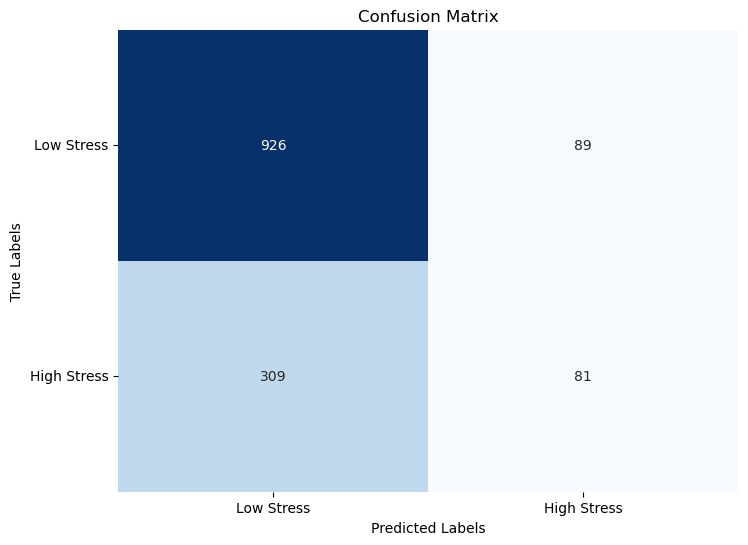

In [13]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['Low Stress', 'High Stress'])
plt.yticks([0.5, 1.5], ['Low Stress', 'High Stress'], rotation=0)
plt.show()



## Model Performance Metrics

- **Accuracy:** ~71.67%  
  - Represents the overall percentage of correct predictions, including both true positives and true negatives.  

- **F1 Score:** ~28.93%  
  - The harmonic mean of precision and recall, balancing the two in imbalanced datasets.  
  - A low F1 score suggests issues with either precision, recall, or both.

- **Precision:** ~47.65%  
  - Indicates the proportion of positive identifications (high stress) that were correct.  
  - A precision below 50% shows that less than half of the high stress predictions were accurate.

- **Recall:** ~20.77%  
  - Measures the model's ability to identify all actual high-stress cases.  
  - The low recall highlights that the model missed a large number of students with high stress.

### Observations:
- While accuracy is relatively high, it may be misleading due to imbalanced data.  
- The low recall and F1 score indicate that the model struggles to identify true high-stress cases effectively.  
- Precision below 50% further underscores the need to reduce false positives in predictions.

### Recommendations:
- **Handle Class Imbalance:** Use techniques such as SMOTE, undersampling, or class-weight adjustments to balance the dataset.  
- **Enhance Features:** Explore additional features or improve existing ones to enhance predictive power.  
- **Experiment with Models:** Consider alternative models like Random Forest or Gradient Boosting to improve precision and recall.
  
    

## Confusion Matrix Interpretation for Logistic Regression

| **Actual \ Predicted** | **Low Stress** | **High Stress** |
|-------------------------|----------------|------------------|
| **Low Stress**          | True Negatives (TN): 926 | False Positives (FP): 89 |
| **High Stress**         | False Negatives (FN): 309 | True Positives (TP): 81 |

### Interpretation:

- **True Negatives (TN = 926):**  
  - The model accurately identified 926 students as not experiencing high stress.  
  - Indicates good **specificity**, effectively distinguishing students without high stress.

- **False Positives (FP = 89):**  
  - 89 students were incorrectly predicted to have high stress.  
  - This can lead to unnecessary interventions or anxiety for those misclassified.

- **True Positives (TP = 81):**  
  - Correctly identified 81 students as experiencing high stress.  
  - These are critical cases for targeted interventions.

- **False Negatives (FN = 309):**  
  - The model failed to recognize 309 students who actually had high stress.  
  - This is a major concern, as these students might not receive the necessary support.

### Key Takeaways:
1. **Conservative Predictions:**  
   - The high number of false negatives suggests the model is conservative in predicting high stress.  
   - This may be due to:
     - **Class Imbalance:** Unequal representation of high and low stress cases in the dataset.
     - **Feature Limitations:** Insufficient predictive power from the current features.

2. **Improving Sensitivity:**  
   - Enhancing the model's ability to detect true positives (sensitivity) is critical to ensure at-risk students are identified and supported effectively.



  
 ------

## Conclusions and Recommendations for Addressing Student Stress

### Conclusions:

1. **High-Risk Groups Identified:**
   - Students in medically related courses face significantly higher stress levels.
   - This underscores the need for tailored support services for these students.

2. **Academic Performance Link:**
   - A strong correlation between CGPA and stress levels highlights academic pressures as a major stress factor.
   - Academic support systems are crucial for stress mitigation.

3. **Lifestyle Factors Matter:**
   - Diet quality and physical activity significantly influence stress levels.
   - Lifestyle interventions can help reduce stress among students.

4. **Importance of Social and Financial Support:**
   - Social support and financial stability are key factors in managing stress.
   - Universities can focus resources in these areas to assist students effectively.

5. **Gender Differences:**
   - Potential gender differences in stress levels suggest the need for gender-specific interventions.

---

### Recommendations:

1. **Targeted Support for High-Risk Courses:**
   - Provide mental health services and stress management workshops for students in high-stress programs, particularly in medical fields.

2. **Academic Support Services:**
   - Enhance tutoring, mentoring, and academic advising services.
   - Introduce flexible policies, such as extended deadlines or pass/fail options, to reduce academic pressure.

3. **Promote Healthy Lifestyle Programs:**
   - Offer physical activity and healthy eating programs, including free or subsidized gym memberships, nutritional counseling, and wellness workshops.

4. **Enhance Financial Aid and Counseling:**
   - Expand financial support services like scholarships and emergency funds.
   - Provide financial planning workshops to help students manage their finances and reduce stress.

5. **Strengthen Social Support Networks:**
   - Develop peer support groups and mentoring programs to foster shared experiences and stress management solutions.
   - Ensure counseling services are accessible and equipped to address diverse mental health issues.

6. **Gender-Sensitive Interventions:**
   - Investigate gender differences in stress levels and create tailored support programs for various gender groups.

---

### Conclusion:

This analysis highlights the complex nature of student stress and the importance of a multi-faceted approach to mental health. By focusing on academic, lifestyle, financial, and social support systems, educational institutions can create a healthier and more supportive learning environment. These initiatives can significantly reduce stress levels and foster student well-being, ultimately contributing to their academic and personal success.